In [1]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

In [3]:
df.head()

neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
df.describe().T

count          mean           std           min  \
neo_id                  338199.0  1.759939e+07  2.287225e+07  2.000433e+06   
absolute_magnitude      338171.0  2.293252e+01  2.911216e+00  9.250000e+00   
estimated_diameter_min  338171.0  1.578120e-01  3.138851e-01  5.111578e-04   
estimated_diameter_max  338171.0  3.528785e-01  7.018685e-01  1.142983e-03   
relative_velocity       338199.0  5.106066e+04  2.639924e+04  2.033464e+02   
miss_distance           338199.0  4.153535e+07  2.077399e+07  6.745533e+03   

                                 25%           50%           75%           max  
neo_id                  3.373980e+06  3.742127e+06  5.405374e+07  5.446281e+07  
absolute_magnitude      2.074000e+01  2.280000e+01  2.510000e+01  3.358000e+01  
estimated_diameter_min  2.538370e-02  7.320740e-02  1.890406e-01  3.754525e+01  
estimated_diameter_max  5.675969e-02  1.636967e-01  4.227075e-01  8.395373e+01  
relative_velocity       3.071203e+04  4.756047e+04  6.667382e+04  2.917811e+05  
miss_distance           2.494540e+07  4.332674e+07  5.933961e+07  7.479865e+07

In [6]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.dropna(inplace=True)

In [85]:
# droppping oribiting body column as it has only single value
df.drop('orbiting_body',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   relative_velocity       338171 non-null  float64
 6   miss_distance           338171 non-null  float64
 7   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 21.0+ MB


In [11]:
#extracting year from name
df['name'].tail(30)

338169      175921 (2000 DM1)
338170    185851 (2000 DP107)
338171           (2013 TE135)
338172             (2014 GK1)
338173             (2015 XQ1)
338174            (2016 TQ18)
338175             (2018 EO4)
338176             (2018 PY7)
338177             (2019 NG2)
338178              (2019 QZ)
338179             (2020 JB1)
338180             (2021 LD2)
338181             (2021 UW2)
338182             (2022 YU3)
338183             (2024 KQ1)
338184              (2024 ND)
338185             (2024 NL2)
338186             (2024 NQ2)
338187     337345 (2001 KO20)
338188     482055 (2010 AH30)
338189             (2017 YZ1)
338190             (2020 HH5)
338191      585310 (2017 YZ1)
338192             (2022 GQ2)
338193             (2022 YJ2)
338194             (2023 VS4)
338195             (2023 XW5)
338196             (2024 KJ7)
338197              (2024 NE)
338198             (2024 NH3)
Name: name, dtype: object

In [86]:
import re
pattern = r'\((\d{4})'

In [87]:
text = df['name'].loc[338197]
text

'(2024 NE)'

In [14]:
re.findall(pattern,text)[0]

'2024'

In [88]:
def find_year(text):
    match = re.search(pattern,text)
    if match:
        return match.group(1)
    else:
        return -9999

In [89]:
df['year'] = df['name'].apply(find_year)
df['year'] = df['year'].apply(lambda x : int(x))

In [17]:
len(df['year'])

338171

In [18]:
len(df)

338171

In [19]:
df.head()

neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max  relative_velocity  miss_distance  is_hazardous  \
0                0.883161       71745.401048   5.814362e+07         False   
1                1.185878      109949.757148   5.580105e+07          True   
2                0.304818       24865.506798   6.720689e+07         False   
3                0.444672       78890.076805   3.039644e+07         False   
4                0.171412       56036.519484   6.311863e+07         False   

   year  
0  1998  
1  2008  
2  2003  
3  2002  
4  2011

In [90]:
#dropping neo_id,name columns
df.select_dtypes(include='number').corr()

neo_id  absolute_magnitude  estimated_diameter_min  \
neo_id                  1.000000            0.350145               -0.198471   
absolute_magnitude      0.350145            1.000000               -0.594646   
estimated_diameter_min -0.198471           -0.594646                1.000000   
estimated_diameter_max -0.198471           -0.594646                1.000000   
relative_velocity      -0.103069           -0.345570                0.222434   
miss_distance          -0.090746           -0.213523                0.111475   
year                    0.047052            0.060509               -0.433033   

                        estimated_diameter_max  relative_velocity  \
neo_id                               -0.198471          -0.103069   
absolute_magnitude                   -0.594646          -0.345570   
estimated_diameter_min                1.000000           0.222434   
estimated_diameter_max                1.000000           0.222434   
relative_velocity                     0.222434           1.000000   
miss_distance                         0.111475           0.322589   
year                                 -0.433033          -0.001228   

                        miss_distance      year  
neo_id                      -0.090746  0.047052  
absolute_magnitude          -0.213523  0.060509  
estimated_diameter_min       0.111475 -0.433033  
estimated_diameter_max       0.111475 -0.433033  
relative_velocity            0.322589 -0.001228  
miss_distance                1.000000 -0.007894  
year                        -0.007894  1.000000

In [91]:
df = df.drop(['neo_id','name'],axis=1)

<Axes: xlabel='is_hazardous', ylabel='count'>

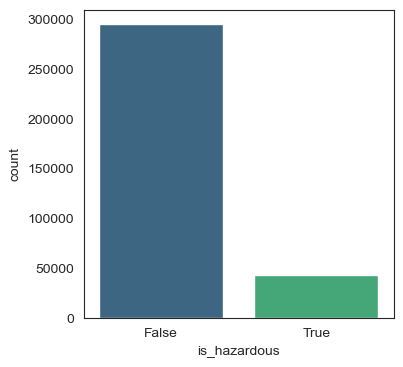

In [22]:
%matplotlib inline
sns.set_style('white')
plt.figure(figsize=(4,4))
sns.countplot(x='is_hazardous',data =df, palette='viridis')

In [23]:
df['is_hazardous'].value_counts()

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

In [24]:
def plot_box(df):
    column_list = list(df.select_dtypes(include='number').columns)
    num_plots = len(column_list)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10))
    for i,column in enumerate(column_list):
        row = i//2
        col = i %2
        ax = axes[row,col]
        sns.boxplot(x = 'is_hazardous',y=column,data=df,ax=ax,palette='Set3',linewidth=0.5)
        ax.set_title(f'Boxplot of {column}')
        ax.set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()

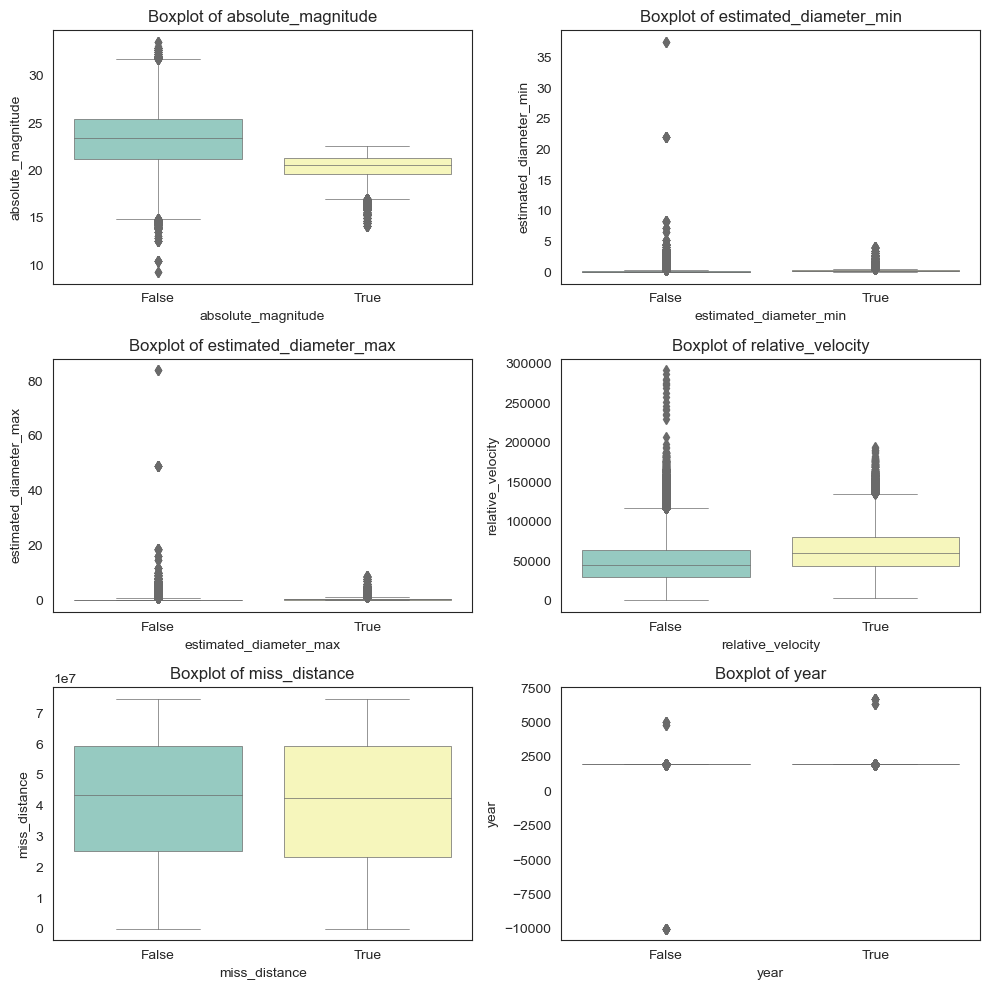

In [25]:
plot_box(df)

In [35]:
def plot_hist(df):
    column_list = list(df.select_dtypes(include='number').columns)
    num_plots = len(column_list)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10))
    for i,column in enumerate(column_list):
        row = i//2
        col = i %2
        ax = axes[row,col]
        sns.histplot(x=column,data=df,ax=ax,palette='Set3',linewidth=0.5,hue='is_hazardous',bins=70,kde=True)
        ax.set_title(f'Histplot of {column}')
        ax.set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()

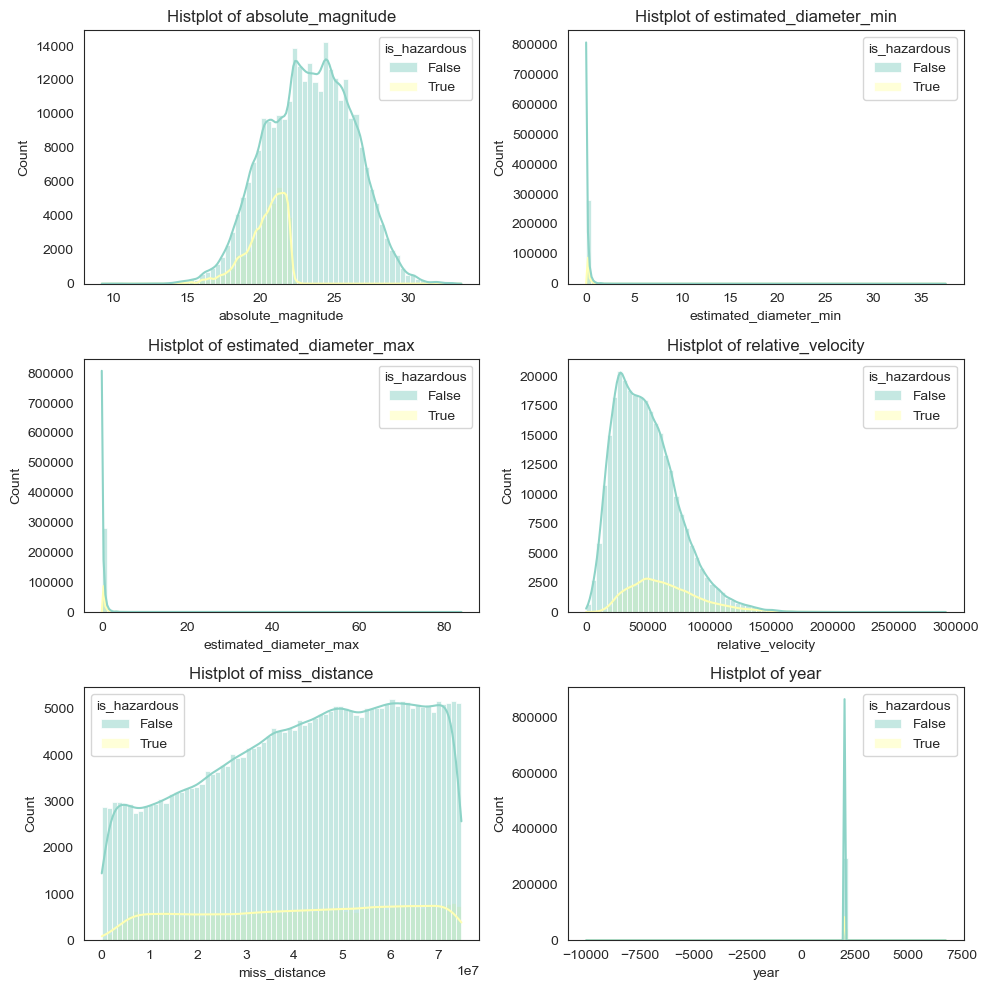

In [36]:
plot_hist(df)

<Axes: >

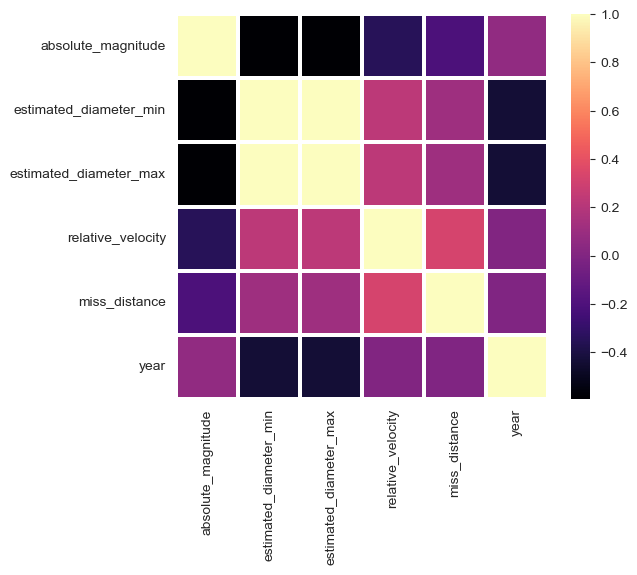

In [38]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include='number').corr(),cmap="magma",linecolor='white',linewidths=1.5)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float32
 1   estimated_diameter_min  338171 non-null  float32
 2   estimated_diameter_max  338171 non-null  float32
 3   relative_velocity       338171 non-null  float32
 4   miss_distance           338171 non-null  float32
 5   is_hazardous            338171 non-null  bool   
 6   year                    338171 non-null  int16  
dtypes: bool(1), float32(5), int16(1)
memory usage: 18.1 MB


In [149]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
df['is_hazardous'] = lbl_en.fit_transform(df['is_hazardous'])

In [150]:
#splitting into train and test
X = df.drop('is_hazardous',axis=1)
y = df['is_hazardous']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)

In [151]:
#scaling
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)
X_val = st_sclr.transform(X_val)

In [152]:
df['is_hazardous'].value_counts()

is_hazardous
0    295009
1     43162
Name: count, dtype: int64

In [176]:
#imabalance exist in the class, to solve this we use SMOTE, ADASYN
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(y_train)
print("Before",counter)
ada = ADASYN()
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)
counter = Counter(y_train_ada)
print("After",counter)

Before Counter({0: 165205, 1: 24170})
After Counter({0: 165205, 1: 159971})


In [224]:
from imblearn.over_sampling import SVMSMOTE
from collections import Counter

# Initialize the KMeansSMOTE object with adjusted parameters
svm = SVMSMOTE()

# Print class distribution before oversampling
print("Before:", Counter(y_train))

# Fit and apply the resampling
X_train_svm, y_train_svm = svm.fit_resample(X_train, y_train)

# Print class distribution after oversampling
print("After:", Counter(y_train_svm))

Before: Counter({0: 165205, 1: 24170})
After: Counter({1: 165205, 0: 165205})


In [177]:
X_train_ada,X_val_ada,y_train_ada,y_val_ada = train_test_split(X_train_ada,y_train_ada,test_size=0.2,stratify=y_train_ada)

### comparing models based on f1,accuracy and roc_auc 

In [45]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,roc_auc_score

In [46]:
metrics_dic = {}

In [47]:
def train_model(model,name,X_train,y_train,X_test,y_test):
    #train model
    model.fit(X_train,y_train)
    #make prediction
    prediction = model.predict(X_test)
    #print classification
    print(classification_report(y_test,prediction))
    #f1score
    f_1 = f1_score(y_test,prediction)
    #accuracy score
    accuracy = accuracy_score(y_test,prediction)
    #roc_aucscore
    roc_auc = roc_auc_score(y_test,prediction)
    metrics = ['F1 Score', 'ROC AUC', 'Accuracy']
    values = [f_1,roc_auc,accuracy]
    metrics_dic[name] = values
    data = {'Metric': metrics, 'Value': values}
    plt.figure(figsize=(4.5,4.5))
    sns.barplot(x='Metric', y='Value', data=data, palette='winter_r', edgecolor='white')
    plt.ylim(0, 1.1)
    plt.title(f'Metrics For {name}')
    plt.ylabel('Score')
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom')
    plt.show()
    print('\n')
    print(f'F1 score: {f_1:.4f}')
    print('\n')
    print(f'ROC AUC score: {roc_auc:.4f}')
    print('\n')
    print(f'Accuracy: {accuracy:.4f}')

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

              precision    recall  f1-score   support

       False       0.92      0.98      0.95     88503
        True       0.77      0.40      0.52     12949

    accuracy                           0.91    101452
   macro avg       0.85      0.69      0.74    101452
weighted avg       0.90      0.91      0.89    101452



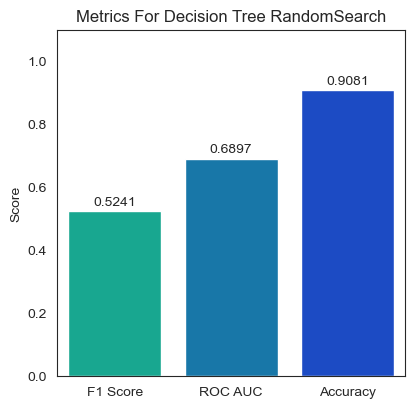



F1 score: 0.5241


ROC AUC score: 0.6897


Accuracy: 0.9081


In [50]:
#tuning
from sklearn.model_selection import RandomizedSearchCV
random_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
rand_grid = RandomizedSearchCV(dtree,random_param_grid,n_iter=50,verbose=0)
train_model(rand_grid,"Decision Tree RandomSearch",X_train,y_train,X_test,y_test)

### After ADASYN

              precision    recall  f1-score   support

       False       0.98      0.77      0.86     88503
        True       0.36      0.89      0.52     12949

    accuracy                           0.79    101452
   macro avg       0.67      0.83      0.69    101452
weighted avg       0.90      0.79      0.82    101452



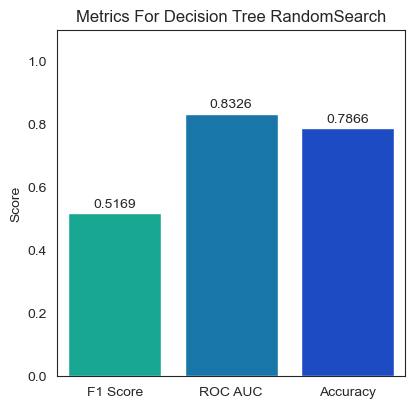



F1 score: 0.5169


ROC AUC score: 0.8326


Accuracy: 0.7866


In [51]:
from sklearn.model_selection import RandomizedSearchCV
random_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
rand_grid = RandomizedSearchCV(dtree,random_param_grid,n_iter=50,verbose=0)
train_model(rand_grid,"Decision Tree RandomSearch",X_train_ada,y_train_ada,X_test,y_test)

              precision    recall  f1-score   support

       False       0.98      0.97      0.98     88503
        True       0.83      0.90      0.86     12949

    accuracy                           0.96    101452
   macro avg       0.91      0.94      0.92    101452
weighted avg       0.97      0.96      0.96    101452



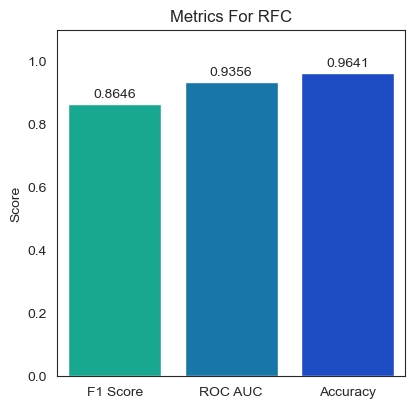



F1 score: 0.8646


ROC AUC score: 0.9356


Accuracy: 0.9641


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
train_model(rfc,"RFC",X_train_ada,y_train_ada,X_test,y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     88503
           1       0.91      0.81      0.85     12949

    accuracy                           0.96    101452
   macro avg       0.94      0.90      0.92    101452
weighted avg       0.96      0.96      0.96    101452



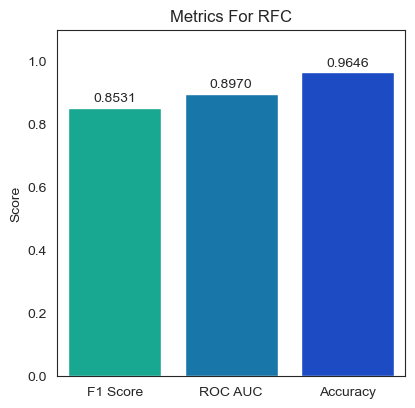



F1 score: 0.8531


ROC AUC score: 0.8970


Accuracy: 0.9646


In [227]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
train_model(rfc,"RFC",X_train_resampled,y_train_resampled,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     88503
           1       0.87      0.86      0.87     12949

    accuracy                           0.97    101452
   macro avg       0.93      0.92      0.92    101452
weighted avg       0.97      0.97      0.97    101452



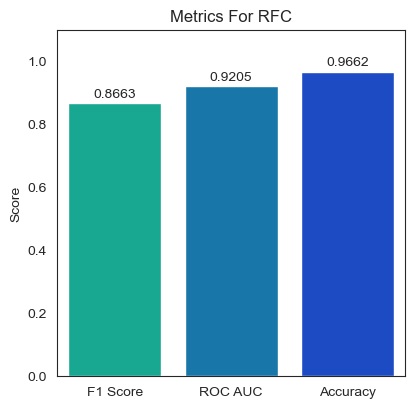



F1 score: 0.8663


ROC AUC score: 0.9205


Accuracy: 0.9662


In [228]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
train_model(rfc,"RFC",X_train_rand,y_train_rand,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     88503
           1       0.83      0.89      0.86     12949

    accuracy                           0.96    101452
   macro avg       0.91      0.93      0.92    101452
weighted avg       0.96      0.96      0.96    101452



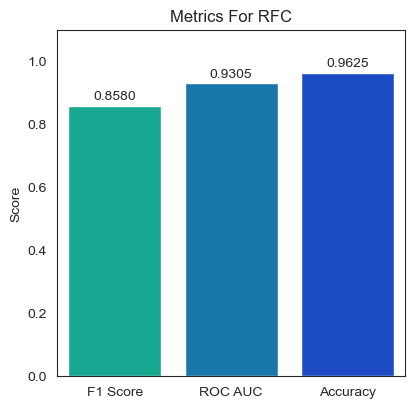



F1 score: 0.8580


ROC AUC score: 0.9305


Accuracy: 0.9625


In [229]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
train_model(rfc,"RFC",X_train_svm,y_train_svm,X_test,y_test)

### Rfc was able to use extra data better

### without adasyn

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     88503
        True       0.91      0.81      0.85     12949

    accuracy                           0.96    101452
   macro avg       0.94      0.90      0.92    101452
weighted avg       0.96      0.96      0.96    101452



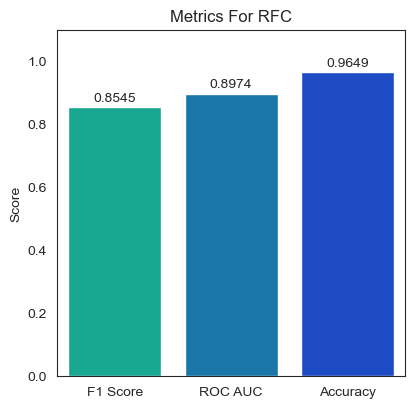



F1 score: 0.8545


ROC AUC score: 0.8974


Accuracy: 0.9649
14.432659149169922


In [95]:
import time
start = time.time()
train_model(rfc,"RFC",X_train,y_train,X_test,y_test)
end = time.time()
print(end - start)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


### Optuna with Rfc

In [60]:
from sklearn.model_selection import cross_val_score
import optuna

In [73]:
#exploring ranges of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338171 non-null  float64
 4   miss_distance           338171 non-null  float64
 5   is_hazardous            338171 non-null  bool   
 6   year                    338171 non-null  int64  
dtypes: bool(1), float64(5), int64(1)
memory usage: 26.4 MB


In [71]:
df['absolute_magnitude'].describe()

count    338171.000000
mean         22.932525
std           2.911216
min           9.250000
25%          20.740000
50%          22.800000
75%          25.100000
max          33.580000
Name: absolute_magnitude, dtype: float64

In [96]:
#using float 32 on these values
#float 32 provides accuracy till 7 digits
df['absolute_magnitude'] = df['absolute_magnitude'].astype('float32')

In [97]:
df['estimated_diameter_min'].describe()

count    338171.000000
mean          0.157812
std           0.313885
min           0.000511
25%           0.025384
50%           0.073207
75%           0.189041
max          37.545248
Name: estimated_diameter_min, dtype: float64

In [98]:
df['estimated_diameter_min'] = df['estimated_diameter_min'].astype('float32')

In [99]:
df['estimated_diameter_max'] = df['estimated_diameter_max'].astype('float32')

In [78]:
df['relative_velocity'].describe()

count    338171.000000
mean      51060.017994
std       26399.922830
min         203.346433
25%       30710.626399
50%       47557.046397
75%       66673.223798
max      291781.106613
Name: relative_velocity, dtype: float64

In [100]:
df['relative_velocity'] = df['relative_velocity'].astype('float32')

In [108]:
df['miss_distance'] = df['miss_distance'].astype('float32')

In [101]:
df['year'] = df['year'].astype('int16')

              precision    recall  f1-score   support

       False       0.99      0.97      0.98     88503
        True       0.83      0.90      0.87     12949

    accuracy                           0.96    101452
   macro avg       0.91      0.94      0.92    101452
weighted avg       0.97      0.96      0.96    101452



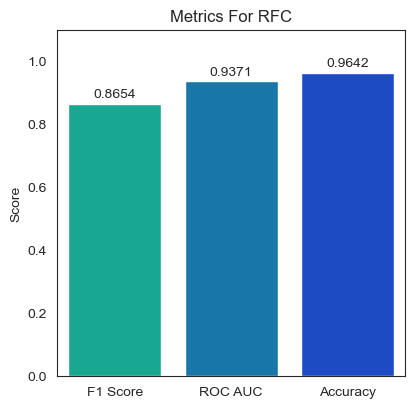



F1 score: 0.8654


ROC AUC score: 0.9371


Accuracy: 0.9642
55.51597595214844


In [114]:
import time
start = time.time()
train_model(rfc,"RFC",X_train_ada,y_train_ada,X_test,y_test)
end = time.time()
print(end - start)

### SVM

              precision    recall  f1-score   support

       False       1.00      0.68      0.81     88503
        True       0.31      0.99      0.47     12949

    accuracy                           0.72    101452
   macro avg       0.65      0.83      0.64    101452
weighted avg       0.91      0.72      0.76    101452



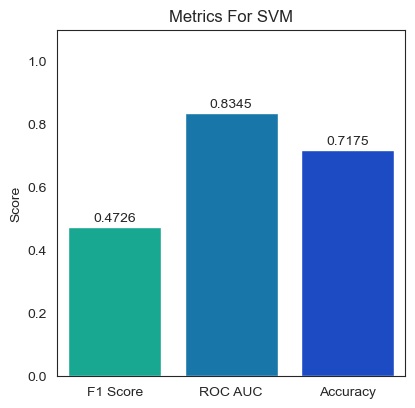



F1 score: 0.4726


ROC AUC score: 0.8345


Accuracy: 0.7175


In [115]:
from sklearn.svm import SVC
svm = SVC()
train_model(svm,"SVM",X_train_ada,y_train_ada,X_test,y_test)

### Catboost

In [116]:
from catboost import CatBoostClassifier,metrics,Pool

In [168]:
cat_ft = np.where(X.dtypes!='float')[0]
parameters = {
    'iterations': 2500,                
    'learning_rate': 0.025,               
    'depth': 13,                         
    'l2_leaf_reg': 5,                   
    'bagging_temperature': 1.0,         # Controls intensity of Bayesian bagging
    'border_count': 254,                # Number of splits for numerical features         # Indices of categorical features in the input data
    'thread_count': 8,                  # Number of parallel threads used for training
    'random_seed': 42,                  # Seed for random number generator for reproducibility
    'loss_function': 'Logloss',         # Loss function to optimize during training
    'eval_metric': 'AUC',               # Metric used for evaluation
    'custom_metric': ['Accuracy', 'AUC'], # Additional metrics to be evaluated during training
    'use_best_model': True,            
    'od_type': 'Iter',                  
    'verbose': True              
}

In [178]:
model = CatBoostClassifier(
    **parameters
    
)
model.fit(
    X_train_ada, y_train_ada,
    eval_set=(X_val_ada, y_val_ada),
    #logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8775269	best: 0.8775269 (0)	total: 133ms	remaining: 5m 31s
1:	test: 0.8855266	best: 0.8855266 (1)	total: 220ms	remaining: 4m 34s
2:	test: 0.8883478	best: 0.8883478 (2)	total: 287ms	remaining: 3m 59s
3:	test: 0.8901870	best: 0.8901870 (3)	total: 368ms	remaining: 3m 49s
4:	test: 0.8906329	best: 0.8906329 (4)	total: 447ms	remaining: 3m 42s
5:	test: 0.8948311	best: 0.8948311 (5)	total: 558ms	remaining: 3m 51s
6:	test: 0.8949198	best: 0.8949198 (6)	total: 679ms	remaining: 4m 1s
7:	test: 0.8990613	best: 0.8990613 (7)	total: 781ms	remaining: 4m 3s
8:	test: 0.9060104	best: 0.9060104 (8)	total: 887ms	remaining: 4m 5s
9:	test: 0.9060200	best: 0.9060200 (9)	total: 995ms	remaining: 4m 7s
10:	test: 0.9075366	best: 0.9075366 (10)	total: 1.09s	remaining: 4m 7s
11:	test: 0.9069950	best: 0.9075366 (10)	total: 1.19s	remaining: 4m 6s
12:	test: 0.9076620	best: 0.9076620 (12)	total: 1.29s	remaining: 4m 7s
13:	test: 0.9079315	best: 0.9079315 (13)	total: 1.39s	remaining: 4m 6s
14:	test: 0.9085173	

115:	test: 0.9683489	best: 0.9683489 (115)	total: 10s	remaining: 3m 26s
116:	test: 0.9683920	best: 0.9683920 (116)	total: 10.1s	remaining: 3m 25s
117:	test: 0.9684508	best: 0.9684508 (117)	total: 10.2s	remaining: 3m 25s
118:	test: 0.9684935	best: 0.9684935 (118)	total: 10.3s	remaining: 3m 25s
119:	test: 0.9685948	best: 0.9685948 (119)	total: 10.3s	remaining: 3m 25s
120:	test: 0.9686140	best: 0.9686140 (120)	total: 10.4s	remaining: 3m 25s
121:	test: 0.9686277	best: 0.9686277 (121)	total: 10.5s	remaining: 3m 24s
122:	test: 0.9686827	best: 0.9686827 (122)	total: 10.6s	remaining: 3m 24s
123:	test: 0.9687349	best: 0.9687349 (123)	total: 10.6s	remaining: 3m 24s
124:	test: 0.9688324	best: 0.9688324 (124)	total: 10.7s	remaining: 3m 23s
125:	test: 0.9688687	best: 0.9688687 (125)	total: 10.8s	remaining: 3m 23s
126:	test: 0.9689323	best: 0.9689323 (126)	total: 10.9s	remaining: 3m 23s
127:	test: 0.9690072	best: 0.9690072 (127)	total: 10.9s	remaining: 3m 22s
128:	test: 0.9690753	best: 0.9690753 (12

227:	test: 0.9751000	best: 0.9751000 (227)	total: 20.9s	remaining: 3m 28s
228:	test: 0.9751468	best: 0.9751468 (228)	total: 21s	remaining: 3m 28s
229:	test: 0.9752078	best: 0.9752078 (229)	total: 21.1s	remaining: 3m 28s
230:	test: 0.9752540	best: 0.9752540 (230)	total: 21.2s	remaining: 3m 28s
231:	test: 0.9753104	best: 0.9753104 (231)	total: 21.3s	remaining: 3m 28s
232:	test: 0.9753700	best: 0.9753700 (232)	total: 21.4s	remaining: 3m 28s
233:	test: 0.9754123	best: 0.9754123 (233)	total: 21.5s	remaining: 3m 28s
234:	test: 0.9754517	best: 0.9754517 (234)	total: 21.6s	remaining: 3m 28s
235:	test: 0.9755256	best: 0.9755256 (235)	total: 21.7s	remaining: 3m 27s
236:	test: 0.9755641	best: 0.9755641 (236)	total: 21.7s	remaining: 3m 27s
237:	test: 0.9755969	best: 0.9755969 (237)	total: 21.8s	remaining: 3m 27s
238:	test: 0.9756364	best: 0.9756364 (238)	total: 21.9s	remaining: 3m 27s
239:	test: 0.9756818	best: 0.9756818 (239)	total: 22s	remaining: 3m 26s
240:	test: 0.9757254	best: 0.9757254 (240)

338:	test: 0.9795852	best: 0.9795852 (338)	total: 31.8s	remaining: 3m 23s
339:	test: 0.9796258	best: 0.9796258 (339)	total: 32s	remaining: 3m 23s
340:	test: 0.9796617	best: 0.9796617 (340)	total: 32.1s	remaining: 3m 23s
341:	test: 0.9796902	best: 0.9796902 (341)	total: 32.2s	remaining: 3m 23s
342:	test: 0.9797209	best: 0.9797209 (342)	total: 32.3s	remaining: 3m 23s
343:	test: 0.9797559	best: 0.9797559 (343)	total: 32.4s	remaining: 3m 23s
344:	test: 0.9797842	best: 0.9797842 (344)	total: 32.5s	remaining: 3m 23s
345:	test: 0.9798141	best: 0.9798141 (345)	total: 32.6s	remaining: 3m 23s
346:	test: 0.9798453	best: 0.9798453 (346)	total: 32.7s	remaining: 3m 22s
347:	test: 0.9798587	best: 0.9798587 (347)	total: 32.8s	remaining: 3m 22s
348:	test: 0.9799276	best: 0.9799276 (348)	total: 32.8s	remaining: 3m 22s
349:	test: 0.9799668	best: 0.9799668 (349)	total: 32.9s	remaining: 3m 22s
350:	test: 0.9799952	best: 0.9799952 (350)	total: 33s	remaining: 3m 22s
351:	test: 0.9800216	best: 0.9800216 (351)

452:	test: 0.9829205	best: 0.9829205 (452)	total: 40.6s	remaining: 3m 3s
453:	test: 0.9829474	best: 0.9829474 (453)	total: 40.6s	remaining: 3m 3s
454:	test: 0.9829721	best: 0.9829721 (454)	total: 40.7s	remaining: 3m 2s
455:	test: 0.9829899	best: 0.9829899 (455)	total: 40.8s	remaining: 3m 2s
456:	test: 0.9830218	best: 0.9830218 (456)	total: 40.8s	remaining: 3m 2s
457:	test: 0.9830531	best: 0.9830531 (457)	total: 40.9s	remaining: 3m 2s
458:	test: 0.9830832	best: 0.9830832 (458)	total: 41s	remaining: 3m 2s
459:	test: 0.9830888	best: 0.9830888 (459)	total: 41.1s	remaining: 3m 2s
460:	test: 0.9831073	best: 0.9831073 (460)	total: 41.2s	remaining: 3m 2s
461:	test: 0.9831316	best: 0.9831316 (461)	total: 41.2s	remaining: 3m 1s
462:	test: 0.9831488	best: 0.9831488 (462)	total: 41.3s	remaining: 3m 1s
463:	test: 0.9831622	best: 0.9831622 (463)	total: 41.4s	remaining: 3m 1s
464:	test: 0.9831758	best: 0.9831758 (464)	total: 41.4s	remaining: 3m 1s
465:	test: 0.9832039	best: 0.9832039 (465)	total: 41.

566:	test: 0.9851733	best: 0.9851733 (566)	total: 48.9s	remaining: 2m 46s
567:	test: 0.9851990	best: 0.9851990 (567)	total: 49s	remaining: 2m 46s
568:	test: 0.9852174	best: 0.9852174 (568)	total: 49.1s	remaining: 2m 46s
569:	test: 0.9852345	best: 0.9852345 (569)	total: 49.2s	remaining: 2m 46s
570:	test: 0.9852580	best: 0.9852580 (570)	total: 49.2s	remaining: 2m 46s
571:	test: 0.9852711	best: 0.9852711 (571)	total: 49.3s	remaining: 2m 46s
572:	test: 0.9852827	best: 0.9852827 (572)	total: 49.4s	remaining: 2m 46s
573:	test: 0.9852965	best: 0.9852965 (573)	total: 49.5s	remaining: 2m 45s
574:	test: 0.9853071	best: 0.9853071 (574)	total: 49.5s	remaining: 2m 45s
575:	test: 0.9853119	best: 0.9853119 (575)	total: 49.6s	remaining: 2m 45s
576:	test: 0.9853236	best: 0.9853236 (576)	total: 49.7s	remaining: 2m 45s
577:	test: 0.9853362	best: 0.9853362 (577)	total: 49.7s	remaining: 2m 45s
578:	test: 0.9853499	best: 0.9853499 (578)	total: 49.8s	remaining: 2m 45s
579:	test: 0.9853647	best: 0.9853647 (57

680:	test: 0.9868864	best: 0.9868864 (680)	total: 57.1s	remaining: 2m 32s
681:	test: 0.9869036	best: 0.9869036 (681)	total: 57.2s	remaining: 2m 32s
682:	test: 0.9869110	best: 0.9869110 (682)	total: 57.3s	remaining: 2m 32s
683:	test: 0.9869172	best: 0.9869172 (683)	total: 57.3s	remaining: 2m 32s
684:	test: 0.9869256	best: 0.9869256 (684)	total: 57.4s	remaining: 2m 32s
685:	test: 0.9869335	best: 0.9869335 (685)	total: 57.5s	remaining: 2m 31s
686:	test: 0.9869526	best: 0.9869526 (686)	total: 57.6s	remaining: 2m 31s
687:	test: 0.9869641	best: 0.9869641 (687)	total: 57.6s	remaining: 2m 31s
688:	test: 0.9869730	best: 0.9869730 (688)	total: 57.7s	remaining: 2m 31s
689:	test: 0.9869846	best: 0.9869846 (689)	total: 57.8s	remaining: 2m 31s
690:	test: 0.9869912	best: 0.9869912 (690)	total: 57.8s	remaining: 2m 31s
691:	test: 0.9870002	best: 0.9870002 (691)	total: 57.9s	remaining: 2m 31s
692:	test: 0.9870103	best: 0.9870103 (692)	total: 58s	remaining: 2m 31s
693:	test: 0.9870281	best: 0.9870281 (69

792:	test: 0.9881140	best: 0.9881140 (792)	total: 1m 5s	remaining: 2m 20s
793:	test: 0.9881243	best: 0.9881243 (793)	total: 1m 5s	remaining: 2m 19s
794:	test: 0.9881269	best: 0.9881269 (794)	total: 1m 5s	remaining: 2m 19s
795:	test: 0.9881399	best: 0.9881399 (795)	total: 1m 5s	remaining: 2m 19s
796:	test: 0.9881464	best: 0.9881464 (796)	total: 1m 5s	remaining: 2m 19s
797:	test: 0.9881533	best: 0.9881533 (797)	total: 1m 5s	remaining: 2m 19s
798:	test: 0.9881632	best: 0.9881632 (798)	total: 1m 5s	remaining: 2m 19s
799:	test: 0.9881784	best: 0.9881784 (799)	total: 1m 5s	remaining: 2m 19s
800:	test: 0.9881889	best: 0.9881889 (800)	total: 1m 5s	remaining: 2m 19s
801:	test: 0.9882078	best: 0.9882078 (801)	total: 1m 5s	remaining: 2m 19s
802:	test: 0.9882217	best: 0.9882217 (802)	total: 1m 5s	remaining: 2m 19s
803:	test: 0.9882453	best: 0.9882453 (803)	total: 1m 5s	remaining: 2m 19s
804:	test: 0.9882519	best: 0.9882519 (804)	total: 1m 6s	remaining: 2m 19s
805:	test: 0.9882559	best: 0.9882559 (

903:	test: 0.9891512	best: 0.9891512 (903)	total: 1m 13s	remaining: 2m 10s
904:	test: 0.9891627	best: 0.9891627 (904)	total: 1m 13s	remaining: 2m 10s
905:	test: 0.9891731	best: 0.9891731 (905)	total: 1m 13s	remaining: 2m 10s
906:	test: 0.9891892	best: 0.9891892 (906)	total: 1m 14s	remaining: 2m 10s
907:	test: 0.9891939	best: 0.9891939 (907)	total: 1m 14s	remaining: 2m 10s
908:	test: 0.9892038	best: 0.9892038 (908)	total: 1m 14s	remaining: 2m 10s
909:	test: 0.9892149	best: 0.9892149 (909)	total: 1m 14s	remaining: 2m 10s
910:	test: 0.9892175	best: 0.9892175 (910)	total: 1m 14s	remaining: 2m 9s
911:	test: 0.9892233	best: 0.9892233 (911)	total: 1m 14s	remaining: 2m 9s
912:	test: 0.9892393	best: 0.9892393 (912)	total: 1m 14s	remaining: 2m 9s
913:	test: 0.9892494	best: 0.9892494 (913)	total: 1m 14s	remaining: 2m 9s
914:	test: 0.9892567	best: 0.9892567 (914)	total: 1m 14s	remaining: 2m 9s
915:	test: 0.9892632	best: 0.9892632 (915)	total: 1m 15s	remaining: 2m 9s
916:	test: 0.9892721	best: 0.98

1016:	test: 0.9899613	best: 0.9899613 (1016)	total: 1m 25s	remaining: 2m 4s
1017:	test: 0.9899635	best: 0.9899635 (1017)	total: 1m 25s	remaining: 2m 4s
1018:	test: 0.9899679	best: 0.9899679 (1018)	total: 1m 25s	remaining: 2m 4s
1019:	test: 0.9899817	best: 0.9899817 (1019)	total: 1m 25s	remaining: 2m 3s
1020:	test: 0.9899927	best: 0.9899927 (1020)	total: 1m 25s	remaining: 2m 3s
1021:	test: 0.9900013	best: 0.9900013 (1021)	total: 1m 25s	remaining: 2m 3s
1022:	test: 0.9900067	best: 0.9900067 (1022)	total: 1m 25s	remaining: 2m 3s
1023:	test: 0.9900094	best: 0.9900094 (1023)	total: 1m 25s	remaining: 2m 3s
1024:	test: 0.9900161	best: 0.9900161 (1024)	total: 1m 25s	remaining: 2m 3s
1025:	test: 0.9900165	best: 0.9900165 (1025)	total: 1m 26s	remaining: 2m 3s
1026:	test: 0.9900248	best: 0.9900248 (1026)	total: 1m 26s	remaining: 2m 3s
1027:	test: 0.9900301	best: 0.9900301 (1027)	total: 1m 26s	remaining: 2m 3s
1028:	test: 0.9900362	best: 0.9900362 (1028)	total: 1m 26s	remaining: 2m 3s
1029:	test: 

1125:	test: 0.9906630	best: 0.9906630 (1125)	total: 1m 33s	remaining: 1m 54s
1126:	test: 0.9906701	best: 0.9906701 (1126)	total: 1m 33s	remaining: 1m 54s
1127:	test: 0.9906736	best: 0.9906736 (1127)	total: 1m 33s	remaining: 1m 54s
1128:	test: 0.9906831	best: 0.9906831 (1128)	total: 1m 33s	remaining: 1m 54s
1129:	test: 0.9906894	best: 0.9906894 (1129)	total: 1m 34s	remaining: 1m 54s
1130:	test: 0.9907000	best: 0.9907000 (1130)	total: 1m 34s	remaining: 1m 53s
1131:	test: 0.9907019	best: 0.9907019 (1131)	total: 1m 34s	remaining: 1m 53s
1132:	test: 0.9907124	best: 0.9907124 (1132)	total: 1m 34s	remaining: 1m 53s
1133:	test: 0.9907162	best: 0.9907162 (1133)	total: 1m 34s	remaining: 1m 53s
1134:	test: 0.9907193	best: 0.9907193 (1134)	total: 1m 34s	remaining: 1m 53s
1135:	test: 0.9907246	best: 0.9907246 (1135)	total: 1m 34s	remaining: 1m 53s
1136:	test: 0.9907338	best: 0.9907338 (1136)	total: 1m 34s	remaining: 1m 53s
1137:	test: 0.9907376	best: 0.9907376 (1137)	total: 1m 34s	remaining: 1m 53s

1234:	test: 0.9912136	best: 0.9912136 (1234)	total: 1m 41s	remaining: 1m 44s
1235:	test: 0.9912232	best: 0.9912232 (1235)	total: 1m 42s	remaining: 1m 44s
1236:	test: 0.9912295	best: 0.9912295 (1236)	total: 1m 42s	remaining: 1m 44s
1237:	test: 0.9912358	best: 0.9912358 (1237)	total: 1m 42s	remaining: 1m 44s
1238:	test: 0.9912398	best: 0.9912398 (1238)	total: 1m 42s	remaining: 1m 44s
1239:	test: 0.9912412	best: 0.9912412 (1239)	total: 1m 42s	remaining: 1m 44s
1240:	test: 0.9912433	best: 0.9912433 (1240)	total: 1m 42s	remaining: 1m 44s
1241:	test: 0.9912445	best: 0.9912445 (1241)	total: 1m 42s	remaining: 1m 44s
1242:	test: 0.9912492	best: 0.9912492 (1242)	total: 1m 42s	remaining: 1m 44s
1243:	test: 0.9912536	best: 0.9912536 (1243)	total: 1m 43s	remaining: 1m 44s
1244:	test: 0.9912604	best: 0.9912604 (1244)	total: 1m 43s	remaining: 1m 44s
1245:	test: 0.9912655	best: 0.9912655 (1245)	total: 1m 43s	remaining: 1m 44s
1246:	test: 0.9912688	best: 0.9912688 (1246)	total: 1m 43s	remaining: 1m 44s

1341:	test: 0.9916632	best: 0.9916632 (1341)	total: 1m 54s	remaining: 1m 38s
1342:	test: 0.9916658	best: 0.9916658 (1342)	total: 1m 54s	remaining: 1m 38s
1343:	test: 0.9916703	best: 0.9916703 (1343)	total: 1m 54s	remaining: 1m 38s
1344:	test: 0.9916746	best: 0.9916746 (1344)	total: 1m 54s	remaining: 1m 38s
1345:	test: 0.9916780	best: 0.9916780 (1345)	total: 1m 54s	remaining: 1m 38s
1346:	test: 0.9916828	best: 0.9916828 (1346)	total: 1m 54s	remaining: 1m 37s
1347:	test: 0.9916879	best: 0.9916879 (1347)	total: 1m 54s	remaining: 1m 37s
1348:	test: 0.9916920	best: 0.9916920 (1348)	total: 1m 54s	remaining: 1m 37s
1349:	test: 0.9916968	best: 0.9916968 (1349)	total: 1m 54s	remaining: 1m 37s
1350:	test: 0.9917015	best: 0.9917015 (1350)	total: 1m 54s	remaining: 1m 37s
1351:	test: 0.9917043	best: 0.9917043 (1351)	total: 1m 54s	remaining: 1m 37s
1352:	test: 0.9917091	best: 0.9917091 (1352)	total: 1m 54s	remaining: 1m 37s
1353:	test: 0.9917138	best: 0.9917138 (1353)	total: 1m 54s	remaining: 1m 37s

1449:	test: 0.9920687	best: 0.9920687 (1449)	total: 2m 2s	remaining: 1m 28s
1450:	test: 0.9920682	best: 0.9920687 (1449)	total: 2m 2s	remaining: 1m 28s
1451:	test: 0.9920749	best: 0.9920749 (1451)	total: 2m 2s	remaining: 1m 28s
1452:	test: 0.9920773	best: 0.9920773 (1452)	total: 2m 2s	remaining: 1m 28s
1453:	test: 0.9920803	best: 0.9920803 (1453)	total: 2m 2s	remaining: 1m 28s
1454:	test: 0.9920852	best: 0.9920852 (1454)	total: 2m 2s	remaining: 1m 28s
1455:	test: 0.9920901	best: 0.9920901 (1455)	total: 2m 2s	remaining: 1m 27s
1456:	test: 0.9920945	best: 0.9920945 (1456)	total: 2m 2s	remaining: 1m 27s
1457:	test: 0.9920969	best: 0.9920969 (1457)	total: 2m 2s	remaining: 1m 27s
1458:	test: 0.9921009	best: 0.9921009 (1458)	total: 2m 2s	remaining: 1m 27s
1459:	test: 0.9921051	best: 0.9921051 (1459)	total: 2m 2s	remaining: 1m 27s
1460:	test: 0.9921114	best: 0.9921114 (1460)	total: 2m 3s	remaining: 1m 27s
1461:	test: 0.9921127	best: 0.9921127 (1461)	total: 2m 3s	remaining: 1m 27s
1462:	test: 

1559:	test: 0.9924114	best: 0.9924114 (1559)	total: 2m 10s	remaining: 1m 18s
1560:	test: 0.9924128	best: 0.9924128 (1560)	total: 2m 10s	remaining: 1m 18s
1561:	test: 0.9924190	best: 0.9924190 (1561)	total: 2m 10s	remaining: 1m 18s
1562:	test: 0.9924222	best: 0.9924222 (1562)	total: 2m 10s	remaining: 1m 18s
1563:	test: 0.9924273	best: 0.9924273 (1563)	total: 2m 10s	remaining: 1m 18s
1564:	test: 0.9924300	best: 0.9924300 (1564)	total: 2m 10s	remaining: 1m 18s
1565:	test: 0.9924340	best: 0.9924340 (1565)	total: 2m 10s	remaining: 1m 18s
1566:	test: 0.9924367	best: 0.9924367 (1566)	total: 2m 10s	remaining: 1m 17s
1567:	test: 0.9924402	best: 0.9924402 (1567)	total: 2m 10s	remaining: 1m 17s
1568:	test: 0.9924416	best: 0.9924416 (1568)	total: 2m 11s	remaining: 1m 17s
1569:	test: 0.9924431	best: 0.9924431 (1569)	total: 2m 11s	remaining: 1m 17s
1570:	test: 0.9924457	best: 0.9924457 (1570)	total: 2m 11s	remaining: 1m 17s
1571:	test: 0.9924510	best: 0.9924510 (1571)	total: 2m 11s	remaining: 1m 17s

1667:	test: 0.9927263	best: 0.9927263 (1667)	total: 2m 19s	remaining: 1m 9s
1668:	test: 0.9927279	best: 0.9927279 (1668)	total: 2m 19s	remaining: 1m 9s
1669:	test: 0.9927308	best: 0.9927308 (1669)	total: 2m 19s	remaining: 1m 9s
1670:	test: 0.9927346	best: 0.9927346 (1670)	total: 2m 19s	remaining: 1m 9s
1671:	test: 0.9927371	best: 0.9927371 (1671)	total: 2m 19s	remaining: 1m 9s
1672:	test: 0.9927407	best: 0.9927407 (1672)	total: 2m 19s	remaining: 1m 9s
1673:	test: 0.9927429	best: 0.9927429 (1673)	total: 2m 19s	remaining: 1m 8s
1674:	test: 0.9927447	best: 0.9927447 (1674)	total: 2m 19s	remaining: 1m 8s
1675:	test: 0.9927462	best: 0.9927462 (1675)	total: 2m 19s	remaining: 1m 8s
1676:	test: 0.9927474	best: 0.9927474 (1676)	total: 2m 19s	remaining: 1m 8s
1677:	test: 0.9927501	best: 0.9927501 (1677)	total: 2m 20s	remaining: 1m 8s
1678:	test: 0.9927531	best: 0.9927531 (1678)	total: 2m 20s	remaining: 1m 8s
1679:	test: 0.9927562	best: 0.9927562 (1679)	total: 2m 20s	remaining: 1m 8s
1680:	test: 

1776:	test: 0.9930033	best: 0.9930033 (1776)	total: 2m 28s	remaining: 1m
1777:	test: 0.9930049	best: 0.9930049 (1777)	total: 2m 28s	remaining: 1m
1778:	test: 0.9930050	best: 0.9930050 (1778)	total: 2m 28s	remaining: 1m
1779:	test: 0.9930090	best: 0.9930090 (1779)	total: 2m 29s	remaining: 1m
1780:	test: 0.9930119	best: 0.9930119 (1780)	total: 2m 29s	remaining: 1m
1781:	test: 0.9930147	best: 0.9930147 (1781)	total: 2m 29s	remaining: 1m
1782:	test: 0.9930159	best: 0.9930159 (1782)	total: 2m 29s	remaining: 1m
1783:	test: 0.9930187	best: 0.9930187 (1783)	total: 2m 29s	remaining: 59.9s
1784:	test: 0.9930229	best: 0.9930229 (1784)	total: 2m 29s	remaining: 59.8s
1785:	test: 0.9930259	best: 0.9930259 (1785)	total: 2m 29s	remaining: 59.8s
1786:	test: 0.9930315	best: 0.9930315 (1786)	total: 2m 29s	remaining: 59.7s
1787:	test: 0.9930327	best: 0.9930327 (1787)	total: 2m 29s	remaining: 59.6s
1788:	test: 0.9930338	best: 0.9930338 (1788)	total: 2m 29s	remaining: 59.5s
1789:	test: 0.9930355	best: 0.993

1885:	test: 0.9932657	best: 0.9932657 (1885)	total: 2m 36s	remaining: 51s
1886:	test: 0.9932684	best: 0.9932684 (1886)	total: 2m 36s	remaining: 50.9s
1887:	test: 0.9932707	best: 0.9932707 (1887)	total: 2m 36s	remaining: 50.8s
1888:	test: 0.9932739	best: 0.9932739 (1888)	total: 2m 36s	remaining: 50.7s
1889:	test: 0.9932785	best: 0.9932785 (1889)	total: 2m 36s	remaining: 50.7s
1890:	test: 0.9932830	best: 0.9932830 (1890)	total: 2m 37s	remaining: 50.6s
1891:	test: 0.9932850	best: 0.9932850 (1891)	total: 2m 37s	remaining: 50.5s
1892:	test: 0.9932879	best: 0.9932879 (1892)	total: 2m 37s	remaining: 50.4s
1893:	test: 0.9932918	best: 0.9932918 (1893)	total: 2m 37s	remaining: 50.3s
1894:	test: 0.9932943	best: 0.9932943 (1894)	total: 2m 37s	remaining: 50.2s
1895:	test: 0.9932967	best: 0.9932967 (1895)	total: 2m 37s	remaining: 50.2s
1896:	test: 0.9932978	best: 0.9932978 (1896)	total: 2m 37s	remaining: 50.1s
1897:	test: 0.9932975	best: 0.9932978 (1896)	total: 2m 37s	remaining: 50s
1898:	test: 0.99

1994:	test: 0.9935089	best: 0.9935090 (1993)	total: 2m 44s	remaining: 41.6s
1995:	test: 0.9935102	best: 0.9935102 (1995)	total: 2m 44s	remaining: 41.6s
1996:	test: 0.9935152	best: 0.9935152 (1996)	total: 2m 44s	remaining: 41.5s
1997:	test: 0.9935173	best: 0.9935173 (1997)	total: 2m 44s	remaining: 41.4s
1998:	test: 0.9935195	best: 0.9935195 (1998)	total: 2m 44s	remaining: 41.3s
1999:	test: 0.9935208	best: 0.9935208 (1999)	total: 2m 44s	remaining: 41.2s
2000:	test: 0.9935232	best: 0.9935232 (2000)	total: 2m 44s	remaining: 41.1s
2001:	test: 0.9935257	best: 0.9935257 (2001)	total: 2m 45s	remaining: 41.1s
2002:	test: 0.9935287	best: 0.9935287 (2002)	total: 2m 45s	remaining: 41s
2003:	test: 0.9935303	best: 0.9935303 (2003)	total: 2m 45s	remaining: 40.9s
2004:	test: 0.9935320	best: 0.9935320 (2004)	total: 2m 45s	remaining: 40.8s
2005:	test: 0.9935336	best: 0.9935336 (2005)	total: 2m 45s	remaining: 40.7s
2006:	test: 0.9935356	best: 0.9935356 (2006)	total: 2m 45s	remaining: 40.6s
2007:	test: 0.

2105:	test: 0.9937362	best: 0.9937362 (2105)	total: 2m 55s	remaining: 32.8s
2106:	test: 0.9937379	best: 0.9937379 (2106)	total: 2m 55s	remaining: 32.7s
2107:	test: 0.9937384	best: 0.9937384 (2107)	total: 2m 55s	remaining: 32.6s
2108:	test: 0.9937380	best: 0.9937384 (2107)	total: 2m 55s	remaining: 32.5s
2109:	test: 0.9937409	best: 0.9937409 (2109)	total: 2m 55s	remaining: 32.4s
2110:	test: 0.9937438	best: 0.9937438 (2110)	total: 2m 55s	remaining: 32.3s
2111:	test: 0.9937447	best: 0.9937447 (2111)	total: 2m 55s	remaining: 32.2s
2112:	test: 0.9937471	best: 0.9937471 (2112)	total: 2m 55s	remaining: 32.2s
2113:	test: 0.9937497	best: 0.9937497 (2113)	total: 2m 55s	remaining: 32.1s
2114:	test: 0.9937521	best: 0.9937521 (2114)	total: 2m 55s	remaining: 32s
2115:	test: 0.9937550	best: 0.9937550 (2115)	total: 2m 55s	remaining: 31.9s
2116:	test: 0.9937571	best: 0.9937571 (2116)	total: 2m 55s	remaining: 31.8s
2117:	test: 0.9937581	best: 0.9937581 (2117)	total: 2m 55s	remaining: 31.7s
2118:	test: 0.

2215:	test: 0.9939402	best: 0.9939402 (2215)	total: 3m 4s	remaining: 23.7s
2216:	test: 0.9939428	best: 0.9939428 (2216)	total: 3m 4s	remaining: 23.6s
2217:	test: 0.9939462	best: 0.9939462 (2217)	total: 3m 4s	remaining: 23.5s
2218:	test: 0.9939470	best: 0.9939470 (2218)	total: 3m 5s	remaining: 23.4s
2219:	test: 0.9939486	best: 0.9939486 (2219)	total: 3m 5s	remaining: 23.3s
2220:	test: 0.9939506	best: 0.9939506 (2220)	total: 3m 5s	remaining: 23.3s
2221:	test: 0.9939502	best: 0.9939506 (2220)	total: 3m 5s	remaining: 23.2s
2222:	test: 0.9939522	best: 0.9939522 (2222)	total: 3m 5s	remaining: 23.1s
2223:	test: 0.9939550	best: 0.9939550 (2223)	total: 3m 5s	remaining: 23s
2224:	test: 0.9939578	best: 0.9939578 (2224)	total: 3m 5s	remaining: 22.9s
2225:	test: 0.9939594	best: 0.9939594 (2225)	total: 3m 5s	remaining: 22.9s
2226:	test: 0.9939607	best: 0.9939607 (2226)	total: 3m 5s	remaining: 22.8s
2227:	test: 0.9939624	best: 0.9939624 (2227)	total: 3m 5s	remaining: 22.7s
2228:	test: 0.9939637	best:

2326:	test: 0.9941191	best: 0.9941191 (2326)	total: 3m 13s	remaining: 14.4s
2327:	test: 0.9941218	best: 0.9941218 (2327)	total: 3m 13s	remaining: 14.3s
2328:	test: 0.9941231	best: 0.9941231 (2328)	total: 3m 13s	remaining: 14.2s
2329:	test: 0.9941252	best: 0.9941252 (2329)	total: 3m 13s	remaining: 14.1s
2330:	test: 0.9941266	best: 0.9941266 (2330)	total: 3m 13s	remaining: 14s
2331:	test: 0.9941274	best: 0.9941274 (2331)	total: 3m 13s	remaining: 13.9s
2332:	test: 0.9941290	best: 0.9941290 (2332)	total: 3m 13s	remaining: 13.9s
2333:	test: 0.9941293	best: 0.9941293 (2333)	total: 3m 13s	remaining: 13.8s
2334:	test: 0.9941326	best: 0.9941326 (2334)	total: 3m 13s	remaining: 13.7s
2335:	test: 0.9941333	best: 0.9941333 (2335)	total: 3m 13s	remaining: 13.6s
2336:	test: 0.9941329	best: 0.9941333 (2335)	total: 3m 13s	remaining: 13.5s
2337:	test: 0.9941353	best: 0.9941353 (2337)	total: 3m 14s	remaining: 13.4s
2338:	test: 0.9941360	best: 0.9941360 (2338)	total: 3m 14s	remaining: 13.4s
2339:	test: 0.

2437:	test: 0.9942670	best: 0.9942670 (2437)	total: 3m 23s	remaining: 5.18s
2438:	test: 0.9942699	best: 0.9942699 (2438)	total: 3m 23s	remaining: 5.1s
2439:	test: 0.9942709	best: 0.9942709 (2439)	total: 3m 24s	remaining: 5.02s
2440:	test: 0.9942718	best: 0.9942718 (2440)	total: 3m 24s	remaining: 4.93s
2441:	test: 0.9942721	best: 0.9942721 (2441)	total: 3m 24s	remaining: 4.85s
2442:	test: 0.9942745	best: 0.9942745 (2442)	total: 3m 24s	remaining: 4.77s
2443:	test: 0.9942744	best: 0.9942745 (2442)	total: 3m 24s	remaining: 4.68s
2444:	test: 0.9942763	best: 0.9942763 (2444)	total: 3m 24s	remaining: 4.6s
2445:	test: 0.9942768	best: 0.9942768 (2445)	total: 3m 24s	remaining: 4.52s
2446:	test: 0.9942770	best: 0.9942770 (2446)	total: 3m 24s	remaining: 4.43s
2447:	test: 0.9942795	best: 0.9942795 (2447)	total: 3m 24s	remaining: 4.35s
2448:	test: 0.9942824	best: 0.9942824 (2448)	total: 3m 24s	remaining: 4.27s
2449:	test: 0.9942831	best: 0.9942831 (2449)	total: 3m 25s	remaining: 4.18s
2450:	test: 0.

In [179]:
cat_pred_2 = model.predict(X_test)

In [191]:
def predict_model(prediction,y_test):
    #print classification
    print(classification_report(y_test,prediction))
    #f1score
    f_1 = f1_score(y_test,prediction)
    #accuracy score
    accuracy = accuracy_score(y_test,prediction)
    #roc_aucscore
    roc_auc = roc_auc_score(y_test,prediction)
    metrics = ['F1 Score', 'ROC AUC', 'Accuracy']
    values = [f_1,roc_auc,accuracy]
    data = {'Metric': metrics, 'Value': values}
    plt.figure(figsize=(4.5,4.5))
    sns.barplot(x='Metric', y='Value', data=data, palette='winter_r', edgecolor='white')
    plt.ylim(0, 1.1)
    plt.ylabel('Score')
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom')
    plt.show()
    print('\n')
    print(f'F1 score: {f_1:.4f}')
    print('\n')
    print(f'ROC AUC score: {roc_auc:.4f}')
    print('\n')
    print(f'Accuracy: {accuracy:.4f}')

In [157]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     88503
           1       0.86      0.61      0.71     12949

    accuracy                           0.94    101452
   macro avg       0.90      0.80      0.84    101452
weighted avg       0.93      0.94      0.93    101452



In [193]:
#using adasyn
print(classification_report(y_test,cat_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     88503
           1       0.75      0.77      0.76     12949

    accuracy                           0.94    101452
   macro avg       0.86      0.86      0.86    101452
weighted avg       0.94      0.94      0.94    101452



In [ ]:
params = {
    'learning_rate': 0.01,          # Increase learning rate to a more typical value
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'sub_feature': 0.7,             # Feature fraction for better generalization
    'num_leaves': 300,               # Further reduce the number of leaves
    'min_child_samples': 13,        # Increase min child samples for better generalization
    'n_estimators': 3000,            # Reduce number of estimators
    'max_depth': 300,                # Set max depth to a reasonable value
    'bagging_fraction': 0.75,       # Reduce bagging fraction to introduce more randomness
    'bagging_freq': 5,              # Bagging every 5 iterations
    'lambda_l1': 0.2,               # Add L1 regularization
    'lambda_l2': 0.2                # Add L2 regularization
}

In [209]:
from lightgbm import LGBMClassifier
params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'binary',          # Changed objective to binary
    'metric': 'binary_logloss',     # Changed metric to binary_logloss
    'sub_feature': 0.8,             # colsample_bytree
    'num_leaves': 1000,
    'min_child_samples': 12,        # min_data_in_leaf
    'n_estimators': 9000,
    'max_depth': 1000,                # Set max depth to a reasonable value
    'bagging_fraction': 0.75,       # Reduce bagging fraction to introduce more randomness
    'bagging_freq': 5,              # Bagging every 5 iterations
    'lambda_l1': 0.175,               # Add L1 regularization
    'lambda_l2': 0.175  
}
lgbm = LGBMClassifier(**params)

In [210]:
import time
start = time.time()
lgbm.fit(X_train_ada,y_train_ada,eval_set=(X_val_ada,y_val_ada))
end = time.time()
print(f'Training Time {end-start}')

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     88503
           1       0.82      0.80      0.81     12949

    accuracy                           0.95    101452
   macro avg       0.90      0.89      0.89    101452
weighted avg       0.95      0.95      0.95    101452



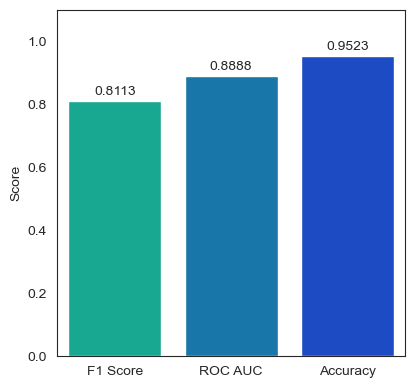



F1 score: 0.8113


ROC AUC score: 0.8888


Accuracy: 0.9523


In [211]:
predict_model(lgbm.predict(X_test),y_test)

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

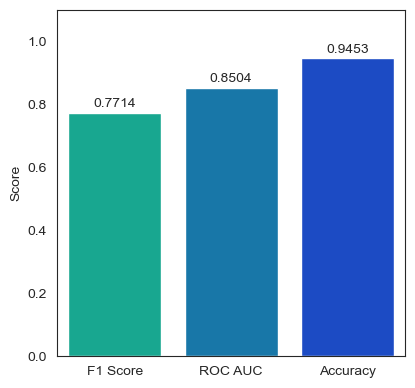



F1 score: 0.7714


ROC AUC score: 0.8504


Accuracy: 0.9453


In [220]:
import time
start = time.time()
lgbm.fit(X_train_resampled,y_train_resampled)
end = time.time()
print(f'Training Time {end-start}')
predict_model(lgbm.predict(X_test),y_test)

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

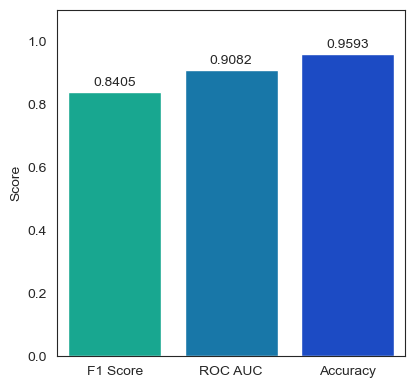



F1 score: 0.8405


ROC AUC score: 0.9082


Accuracy: 0.9593


In [222]:
import time
start = time.time()
lgbm.fit(X_train_rand,y_train_rand)
end = time.time()
print(f'Training Time {end-start}')

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     88503
           1       0.84      0.84      0.84     12949

    accuracy                           0.96    101452
   macro avg       0.91      0.91      0.91    101452
weighted avg       0.96      0.96      0.96    101452



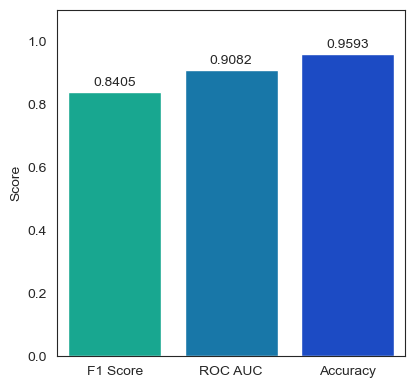



F1 score: 0.8405


ROC AUC score: 0.9082


Accuracy: 0.9593


In [223]:
predict_model(lgbm.predict(X_test),y_test)

In [225]:
import time
start = time.time()
lgbm.fit(X_train_svm,y_train_svm)
end = time.time()
print(f'Training Time {end-start}')

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training Time 484.75109100341797


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.175
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0.175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.175
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     88503
           1       0.84      0.80      0.82     12949

    accuracy                           0.96    101452
   macro avg       0.91      0.89      0.90    101452
weighted avg       0.95      0.96      0.96    101452



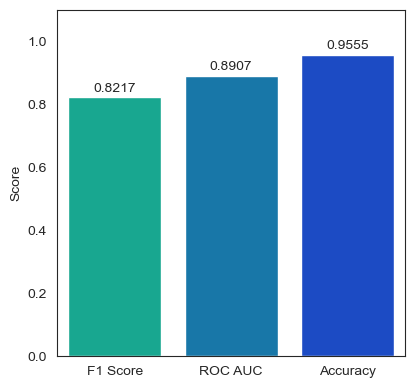



F1 score: 0.8217


ROC AUC score: 0.8907


Accuracy: 0.9555


In [226]:
predict_model(lgbm.predict(X_test),y_test)

### Best model

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     88503
           1       0.83      0.89      0.86     12949

    accuracy                           0.96    101452
   macro avg       0.91      0.93      0.92    101452
weighted avg       0.96      0.96      0.96    101452



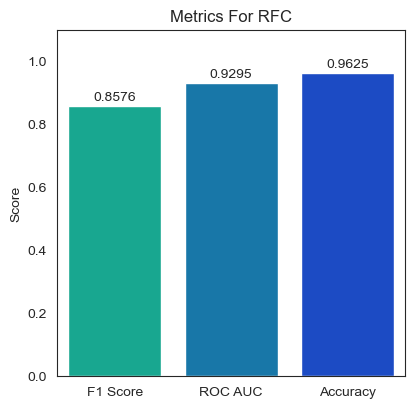



F1 score: 0.8576


ROC AUC score: 0.9295


Accuracy: 0.9625


In [230]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
train_model(rfc,"RFC",X_train_svm,y_train_svm,X_test,y_test)

In [231]:
from xgboost import XGBClassifier,XGBRFClassifier

In [246]:
params_xgb = {
    "tree_method": "auto",
    "n_estimators": 15000,
    "learning_rate": 0.01,
    "max_depth": 30,
    "min_child_weight": 1,
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "gamma": 2,
    "reg_lambda": 1,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 0,
}

In [247]:
xgb = XGBClassifier(**params_xgb)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     88503
           1       0.68      0.87      0.77     12949

    accuracy                           0.93    101452
   macro avg       0.83      0.91      0.86    101452
weighted avg       0.94      0.93      0.94    101452



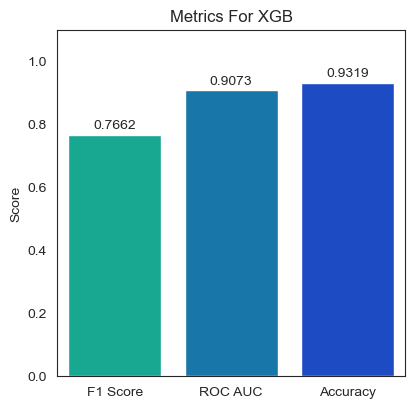



F1 score: 0.7662


ROC AUC score: 0.9073


Accuracy: 0.9319


In [248]:
train_model(xgb,"XGB",X_train_ada,y_train_ada,X_test,y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     88503
           1       0.72      0.91      0.80     12949

    accuracy                           0.94    101452
   macro avg       0.85      0.93      0.89    101452
weighted avg       0.95      0.94      0.95    101452



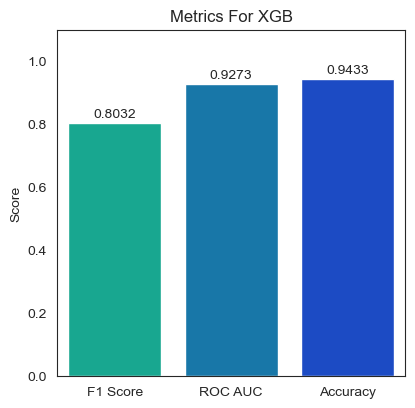



F1 score: 0.8032


ROC AUC score: 0.9273


Accuracy: 0.9433


In [249]:
train_model(xgb,"XGB",X_train_rand,y_train_rand,X_test,y_test)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     88503
           1       0.81      0.61      0.70     12949

    accuracy                           0.93    101452
   macro avg       0.88      0.79      0.83    101452
weighted avg       0.93      0.93      0.93    101452



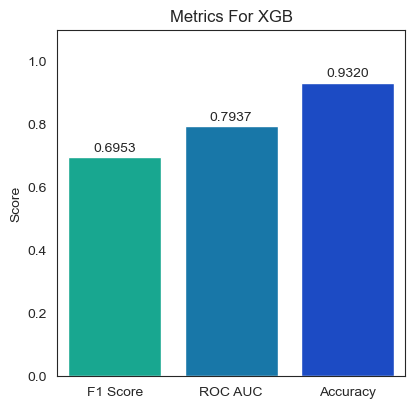



F1 score: 0.6953


ROC AUC score: 0.7937


Accuracy: 0.9320


In [250]:
train_model(xgb,"XGB",X_train_resampled,y_train_resampled,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     88503
           1       0.72      0.85      0.78     12949

    accuracy                           0.94    101452
   macro avg       0.85      0.90      0.87    101452
weighted avg       0.94      0.94      0.94    101452



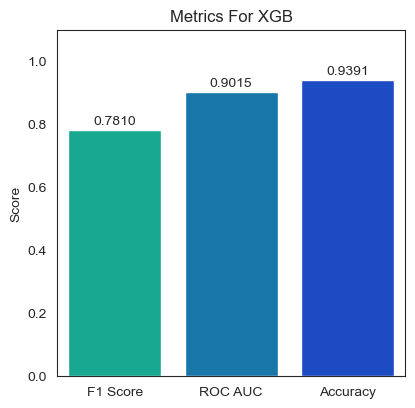



F1 score: 0.7810


ROC AUC score: 0.9015


Accuracy: 0.9391


In [251]:
train_model(xgb,"XGB",X_train_svm,y_train_svm,X_test,y_test)